<font size=7><b> Introduction to Electrophysiology

This notebook will teach you the basics of analyzing [electrophysiology](https://en.wikipedia.org/wiki/Electrophysiology) data. In this homework we will perform some analysis on the data that Prof. Tal Sharf presented on Wednesday (April, 17). Prof. Sharf's experiment was done to determine the affects of a drug called [diazepam](https://en.wikipedia.org/wiki/Diazepam), on [cerebral organoids](https://en.wikipedia.org/wiki/Cerebral_organoid#:~:text=A%20cerebral%20organoid%2C%20or%20brain,over%20a%20course%20of%20months.). 



<font color="red"><b>Note:</b> This homework will be due April 18th at 11:59pm PT.  Make sure to complete the exercises at the bottom of this notebook.

In [1]:
%run "electrophysiology_source_code.ipynb"

# <font color="gray"> Reading Material

<font color="red"> Required Reading:
* [Professor Sharf's paper on Neural Circuitry](reading_material/Tal_Neural_Circuitry.pdf)
* [Spike Time Tiling Introduction](./reading_material/Spike_Time_Tiling.pdf)

Briskly read through [Professor Sharf's paper](reading_material/Tal_Neural_Circuitry.pdf). Some of the exercises require you to read the first few pages. [This paper's](./reading_material/Spike_Time_Tiling.pdf) discussion on Spike Time Tilling is also required reading. [braingeneerspy](https://github.com/braingeneers/braingeneerspy) is the name of the python package used by the Haussler lab for data analsyis. We will be using the [analysis toolkit](https://github.com/braingeneers/braingeneerspy/tree/master/src/braingeneers/analysis) from that package..

**Other Material**
* Wiki Articles:
    * Basic wiki articles on [electrophysiology](https://en.wikipedia.org/wiki/Electrophysiology) , [diazepam](https://en.wikipedia.org/wiki/Diazepam) , [cerebral organoids](https://en.wikipedia.org/wiki/Cerebral_organoid#:~:text=A%20cerebral%20organoid%2C%20or%20brain,over%20a%20course%20of%20months.), [action potential](https://en.wikipedia.org/wiki/Action_potential)
    * Scholarpedia article on [Spike train analysis](http://www.scholarpedia.org/article/Measures_of_spike_train_synchrony)
* Research Papers
    * Review paper on [cerebral organoids](./reading_material/rise_of_organoids.pdf)
    * Professor  [Sharf's paper](reading_material/Tal_Neural_Circuitry.pdf)
    * [Spike Time Tilling](./reading_material/Spike_Time_Tiling.pdf) paper



#  Spike Trains

## Spike Train

A "spike train" (or "spike raster") is an incredibly powerful tool used to analyze neural data. In this notebook you will learn to do some basic analysis on spike train data. A spike train is a 2D matrix where each row represents a neuron, and each column is a single moment in time. Each blue dot in the matrix is a moment in time where a neuron emits a signal to other neurons. This signal can be called a "spike", a "fire", or, more scientifically, an "action potential".


When you look at a spike train, you see every single moment at which a neuron "fires". [This link](http://www.scholarpedia.org/article/Measures_of_spike_train_synchrony) is a great resource if you want to take a deeper dive into spike train analysis. Below is the complete spike raster for the control dataset from the the experiment, `Spike_Raster_Control.mat`.

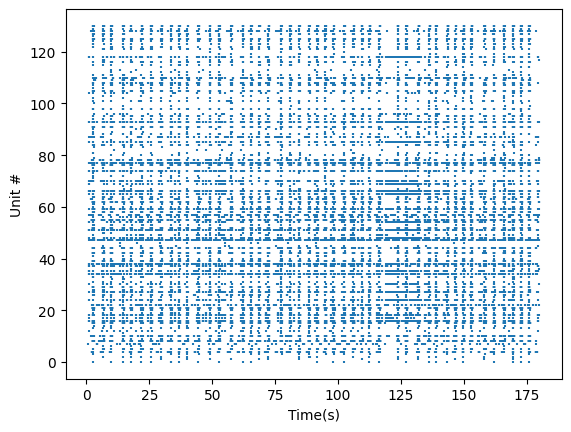

In [2]:
plot_raster(data_control)

## Analysing the Train

When scientists analyze spike trains, they are especially interested in looking at the "neural bursts" that occur. A burst is defined a short window of activity where the neurons are especially active. Looking at the spike raster above you might be able to pick out the neural bursts (the "veritcal lines"), however, bursts are easier to distinguish when you zoom in on the dataset.  

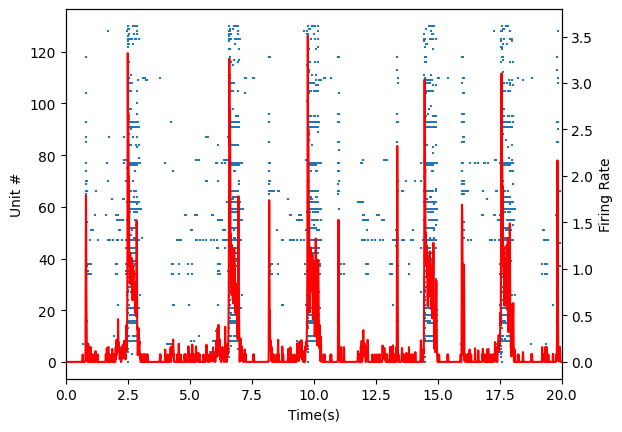

In [3]:
raster_analysis(data_control)

In the example above we have zoomed in on the first 20 seconds of the spike raster shown above. This raster also contains a red line that show the relative activity of neurons at that timestep. Looking at this 20 second window, I see **5** bursts. Defining a burst can be a little tricky. Notice that there are also areas of small activity in between bursts. Below I highlight where I see bursts and areas of activity in the spike raster.

![alt text](.images/burst_analysis.png "Title")

Neuroscientists are interested in bursts not just because they are the areas of most activity, but most importantly, because these regions display repeated patterns of consistent relationships between neurons. Below we zoom in even more on to the first two bursts of the spike raster (8 second window). Notice that the neural activity pattern (red line) looks similar for both bursts. Also, if you look at individual neurons (blue dots) you'll see that they follow similar firing patterns within both bursts.

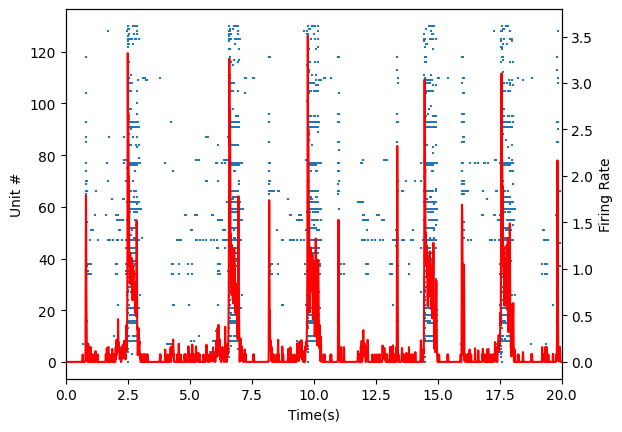

In [4]:
raster_analysis(data_control, seconds=20)

# Neural Relationships

To build the type of beautiful circuit diagrams that were discussed in class, scientists must work backwards by analyzing the firing patterns they see from neurons in the brain. They use different tools to parse out the relationship between neurons.

## Interspike Intervals

Before we attempt to answer the complicated question of "what is the relationship patterns between different neurons?", lets start with a much simpler question: "what is the relationship pattern between a single neuron and itself?". In other words, what properties can we say about the firing pattern of a single neuron?

This is a more complicated question than it might at first seem. Neurons follow a somewhat random behaviour, it is not always certain when, or how often, a neuron will fire. Lets take a "data first" approach to gain a better understanding of when neurons fire. We are going to consider the interval of time that passes in between each moment a neurons fires, this is called the interspike interval. Here is a [brief summary](https://www.tau.ac.il/~tsirel/dump/Static/knowino.org/wiki/Interspike_interval.html#:~:text=The%20interspike%20interval%20is%20the,messengers%20to%20affect%20other%20neurons.) of interspike intervals. Below we see a histogram of the interspike interval for all the neurons in our spike raster from above. What probability distribution does the graph below look like?

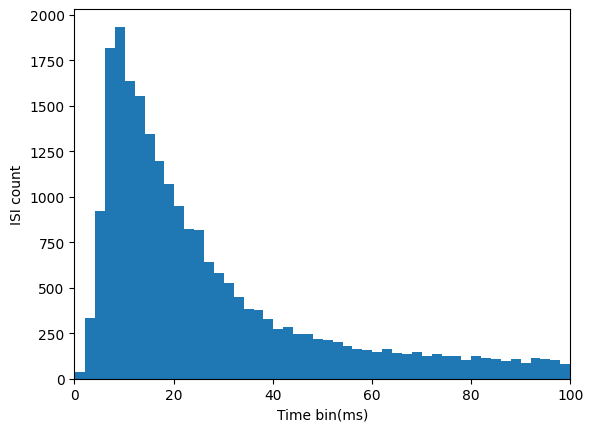

In [5]:
interspike(data_control)

<p>&nbsp</p>

<center><b>Example of Interspike Intervals</b></center>

![alt text](https://www.tau.ac.il/~tsirel/dump/Static/knowino.org/w/images/thumb/3/38/Spiketimes.png/300px-Spiketimes.png)

The mathematicians in the group will be delighted to know that intervals between spikes for a neuron tend to follow a [poission distribution](https://en.wikipedia.org/wiki/Poisson_distribution). This is not a coincidence, read the wiki article to understand why. Many of the beautiful (and complicated) statistical models used to describe the circuit patterns between neurons use the poission distribution as the fundemental building block of more complicated algorithms.

## Correlation Matrix

We have just shown that we can consider each neuron to act as a random variable, with a poission probability of firing at any given time. Given that we are now working with random variables, it is natural to use a correlation matrix to measure the relative strength in relationship between neurons. A correlation matrix displays the correlation between every pair of neurons in our spike raster. 

Below is a correlation matrix created from the spike raster above. Postively correlated neurons show up as a green dot in the plot, where negatively correlated neurons are deep blue. One could imageine strongly correlated neurons as being part of the same cicuit, or even touching. Where negatively correlated neurons may perhaps display some inhibitory cell stopping other neurons from firing. The true interpretation of a correlation matrix is much more vague than this. In reality, more nuanced techniques are used to tease apart cell circuitry. However, as the homework will show, the correlation matrix is still useful for discerning changes in neural behaviour.

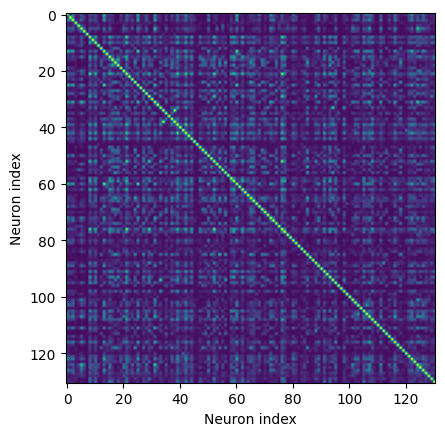

In [6]:
correlation(data_control)       

<p>&nbsp</p>
<center><b>Summary of Correlation</b></center>

![alt text](https://www.mathsisfun.com/data/images/correlation-examples.svg)

# <font color="red">Exercises

The exercises below will provide you with a better understanding of how neural data is analyzed. Note, when completing these exercises, please remember to show your work. If you typed any code to find a solution, please write down your code.

## Prof. Sharf's Paper (5 Points Total)

Read through the first few pages of [Professor Sharf's paper](reading_material/Tal_Neural_Circuitry.pdf). Then answer the following questions.

### Breakthrough Device (3 Points)

What newly developed device has enabled high-resolution readouts of neural activity? What is the name of the specific device (model/maker) used in this paper? How many electrodes can it record from simultaneously?

<font color="green"><b>Answer

The newly developed device that has enabled high-resolution readouts of neural activity is a high-density complementary metal-oxide-semiconductor (CMOS)microelectrode array. The specific device used is the "MaxOne" system from MaxWell Biosystems located in Zurich, Switzerland. The microelectrode array contains 26,400 recording electrodes with a diameter of 7.5 $\mu m$ within a sensing area of $3.85 mm \times 2.1 mm$. The system allows for simultaneous recordings from up to 1024 readout electrodes or channels at a sampling rate of $20kHz$. In addition to the CMOS microelectrode arrays, the researchers also used shank electrodes to capture the spontaneous extra cellular activity from brain organoids derived from human induced stem cells.

### Organoid Models (2 Points)

How long was neural activity recorded for after the cerebral organoid was placed on the recording device? What is the name of 2 drugs that were used to change the neural activity of organoids in the experiment?

<font color="green"><b>Answer

Once positioned on the MEA, spontaneous spiking occurred within ~2 weeks  across organoids, followed by increasing firing rates in the form of synchronized bursts at 6 months and were maximally active at about 7 months. I think the organoid was continuously recorded for 8 months. 

The name of the two drgus that were used to change the neural activity of organoids in the experiment were diazepam, used at a concentration of $50\mu M$, which decreased the inter-burst intervals, burst duration and the number of spikes participating in the burst throughout the organoid. 

The sodium channel blocker tetrodotoxin (TTX) citrate was used as a control measure to validate the neuronal origin of the recorded signals.

## Curating Raw Data (2 Points Total)

When a neuron emits a signal to other cells, it can be called a "spike", a "fire", or, more scientifically, an "action potential". The spike raster that you saw in the lecture above is the final product from considerable work done on the "raw data" recorded from electrodes. A microscopic 2D grid of electrodes calledn an [MEA](https://ars.els-cdn.com/content/image/1-s2.0-S0165027099001132-gr1.jpg) records an "action potential" across multiple locations of the neuron's body. This [wiki article](https://en.wikipedia.org/wiki/Action_potential), gives a good example of what an action potential looks like. A major step in the process of finding neurons from raw data, involves looking at "footprints" of action potentials from prospective neurons. These "footprints" are representative 2D depictions of raw data coming from electrods on the MEA. The **4** images below are footprints of prospective neurons.



For the **4** images below, classify them as either being an "action potential" or as being "noise". When determinning if a "neural footprint" is a spike or noise, consider the following-  The "spike" should be seen across multiple electrodes, furthermore, the neuron should remain consistent across multiple electrodes. There shouldn't be any significant changes in it's appearance.

<font color="orange"><b>Hint:</b> **2** of the images below are action potentials, and the other **2** are noise.

<font color="green"><b>Answer

<b>Image 1:</b> action potential

<b>Image 2:</b> noise

<b>Image 3:</b> action potential 

<b>Image 4:</b> noise

<b><center>Image 1</center></b>
![alt text](.images/spike1.png "Title")

<b><center>Image 2</center></b>
![alt text](.images/spike2.png "Title")

<b><center>Image 3</center></b>
![alt text](.images/spike3.png "Title")

<b><center>Image 4</center></b>
![alt text](.images/spike4.png "Title")

## Analyzing Control Dataset (5 Points Total)

In this section we will calculate some summary statistics on the control dataset, `data_control`. `data_control` is a `SpikeData` object created using the [analysis package](https://github.com/braingeneers/braingeneerspy/blob/master/src/braingeneers/analysis/analysis.py) from the braingeneerspy python library.

### Basic Summary (3 Points)

Lets start my getting a basic summary of the spike raster, `data_control`. How many neurons are there in the recording? How long is the recording (in seconds)? In total, how many spikes occured across all neurons?

<font color="orange">**Hint:** While this question may at first appear oubvious, getting the answer with code may be harder than you expect. This is because `data_control` is coded as a sparse matrix to save on memory. One way of going about this answer is by looking at the variable `length` and some of the code inside of the `rates` function. Another approach is to use the function `raster` with bin size of 1.


<font color="green"><b>Answer

In [7]:
neurons = data_control.N
print(f"Number of neurons in the recording: {neurons}\n")
time = data_control.length / 1000
print(f"Recording length: {time} s\n")
spikes = sum(len(spikes) for spikes in data_control.train)
print(f"Total number  of spikes across all neurons: {spikes}\n")

Number of neurons in the recording: 131

Recording length: 179.8797 s

Total number  of spikes across all neurons: 31756



### Calculate Firing rate (1 Point)

The firing rate of a neuron is a measure of how often the cell fires. It is defined as the total number of spikes divided by total time (in seconds):

$$
\dfrac{\text{spikes}}{\text{time}}
$$

What is the average firing rate for a single neuron in the control dataset?

<font color="orange">**Note:** Here we are asking for the number of spike per second per neuron- aka: the firing rate of the entire recording divided by the number of neurons in the recording.

<font color="green"><b>Answer

In [8]:
print(f"average number of spikes per second: {(spikes/time)/neurons}")

average number of spikes per second: 1.3476351902991721


### Calculate Coefficient of Variation (1 Point)

Given the interspike intervals (ISI's) of a dataset, the "Coefficient of Variation" (CV) is defined as the standard deviation of the ISI's divided by the mean.

$$
\dfrac{\text{sd}\begin{pmatrix}\text{ISI}\end{pmatrix}}{\text{mean}\begin{pmatrix}\text{ISI}\end{pmatrix}}
$$

In neuroscience the CV is commonly used as a measure of randomness in the dataset. A CV of of 1 means that the data folllows a more poission-like distribution. A smaller number for the CV tends to mean that the data is less random. Calculate the CV for the control dataset.

<font color="orange">**Hint:** Use the code inside of the `interspike` function for your ISI's, however, please make sure not to use the variable `isis_raw` when doing the CV calculation.

<font color="green"><b>Answer

In [ ]:
isis = data_control.interspike_intervals()
cvs = []
for isi in isis:
    if len(isi) == 0:
        continue
    std_isi = np.std(isi)
    mu_isi = np.mean(isi)
    if mu_isi > 0:
        cvs.append(std_isi / mu_isi)

print(f"CV for the dataset: {np.mean(cvs)}")

CV for the dataset: 1.5094217147300637


## Analyzing Diazepam Dataset (11.5 Points Total)

In this section we will analyze the results from the cerebral organoid after it was given the drug Diazepam. Specifically, we will be comparing these results the control data to see what affects diazepam has on the tissue.

<font color="orange">**Hint:** When answering the questions below, it's important to remember the general affect that Diazepam has on neurons. In general, diazepam **decreases neural activity**, however, firing patterns between neurons become **more organized** and less random. 

### Load Data (1 Point)

Create a variable called `data_diazepam` which loads the data from `Spike_Raster_Diazepam.mat` into a Braingeneerspy `SpikeData` object. Note, this is the same way we load the control dataset in the source code.

<font color="green"><b>Answer

In [10]:
path = "/home/jovyan/data/ephys/2023-08-28-e-Math_Mind_Class/HW2-Electrophysiology/Spike_Raster_Diazepam.mat"
mat = sio.loadmat(path)
data_diazepam = SpikeData([i[0][0]*1e3 for i in mat['spike_times']])
data_diazepam

### Basic Summary (3 Points)

For the dataset, `data_diazepam`, calculate how many neurons there are, how long the recording is (in seconds), and the total number of spikes that occured.

<font color="green"><b>Answer

In [11]:
_, times = data_diazepam.idces_times()
time = times[-1] / 1000
neurons = data_diazepam.N
spikes = sum(len(spikes) for spikes in data_diazepam.train)
print(f"Neurons in the data_diazepam data set: {neurons}")
print(f"Recording length in seconds: {time} s")
print(f"Total number of spikes that occurred: {spikes}")

Neurons in the data_diazepam data set: 131
Recording length in seconds: 179.9898 s
Total number of spikes that occurred: 20971


### Firing Rate (1 Point)

What is the average firing rate for a single neuron in the diazepam dataset?  How does this compare to the control dataset? Is this consistent with what we expect from Diazepam?

<font color="orange">**Note:** Like before, we are asking for the number of spike per second per neuron

<font color="green"><b>Answer

In [12]:
print(f"Number of spikes per second per neuron: {(spikes/time)/neurons}")

Number of spikes per second per neuron: 0.8894057855814543


### Calculate Coefficient of Variation (1 Point)

Calculate the CV score for Diazepam dataset. Compare your result to the control dataset. Is this result consistent with the general affects we expect from Diazepam?

<font color="green"><b>Answer

In [13]:
cvs = []
for isi in data_diazepam.interspike_intervals():
    if len(isi) == 0:
        continue
    std_isi = np.std(isi)
    mu_isi = np.mean(isi)
    if mu_isi > 0:
        cvs.append(std_isi / mu_isi)
print(f"CV for data_diazepam data set: {np.mean(cvs)}")

CV for data_diazepam data set: 1.0993601607698287


Yes this is consistent with the effects of Diazepam, the firing rate has decreased and the CV has lowered indicating that the data is less random. 

### Bursting Behaviour (4 Points)

#### Macro

Create a zoomed in plot of the spike raster for the diazepam dataset that shows the first 20 seconds of the recording. How many bursts do you see? How does this compare to the number of bursts you saw in the control dataset? Are these results consistent with figures in Tal's paper? If so, which figure?

<font color="green"><b>Answer

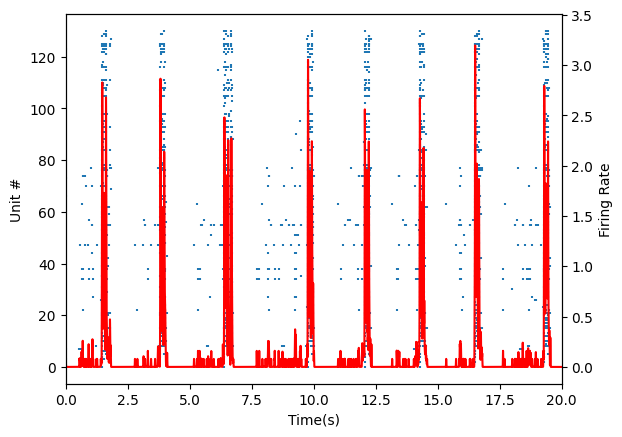

In [14]:
raster_analysis(data_diazepam, seconds=20)

We see $8$ bursts at less regular intervals. The control dataset only had $5$ bursts in a $20$ second interval where each interval was consistently the same. This is consistent with figure 1 d in Tal's paper, the spike-sorted unit raster plot comparing the control to diazepam.  

#### Micro

Create a graph that zooms in on the first **2** bursts from the Diazepam dataset. Compare this to the first **2** bursts of the control dataset. Inside of a burst do the neural acivity patterns look different? If so how?

<font color="green"><b>Answer

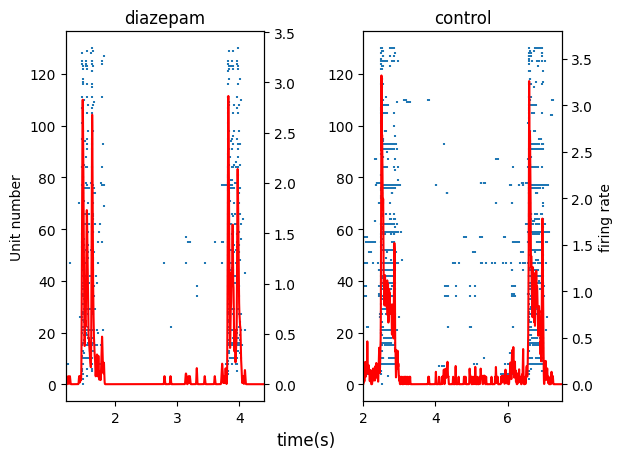

In [15]:
def get_raster(data):
    idces, times = data.idces_times()
    pop_rate = data.binned(bin_size=1)
    sigma = 5
    pop_rate_smooth = gaussian_filter1d(pop_rate.astype(float), sigma=sigma)
    t = np.linspace(0, data.length, pop_rate.shape[0])/1000
    return idces, times, pop_rate_smooth, t

fig, (ax1, ax2) = plt.subplots(1, 2)
i, ts, p, t = get_raster(data_diazepam)
ax1.scatter(ts/1000, i, marker='|', s = 1)
ax12 = ax1.twinx()
ax12.plot(t, p, c = 'r')
ax1.set_xlim(1.2, 4.4)
ax1.set_title("diazepam")
ax1.set_ylabel("Unit number")

plt.subplots_adjust(wspace=0.5)

i, ts, p, t = get_raster(data_control)
ax2.scatter(ts/1000, i, marker='|', s = 1)
ax22 = ax2.twinx()
ax22.plot(t, p, c = 'r')
ax22.set_ylabel("firing rate")
ax2.set_xlim(2.0, 7.5)
ax2.set_title("control")
fig.supxlabel("time(s)")
plt.show()


The diazepam bursts maintain a sustained firing rate throughout the burst interval, while the control burst has a high initial spike (greater than that of the diazepam bursts) and then quickly tapers off throughout the burst interval. Additionally, the time between bursts is shorter for the diazepam data, compared to the longer intervals observed in the control.

### Replicate Correlation and ISI (1.5 Points) <font color="green"> 

Plot the correlation matrix and the ISI histogram for the diazepam dataset. Briefly compare these plots to those from the control dataset.

<font color="green"><b>Answer

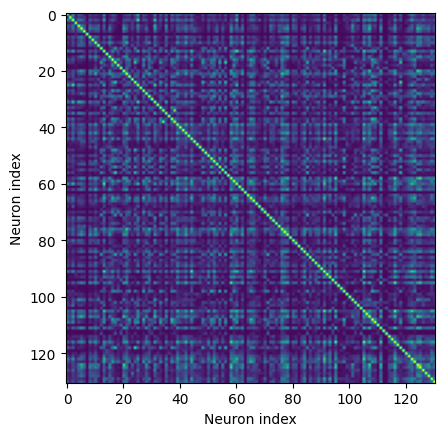

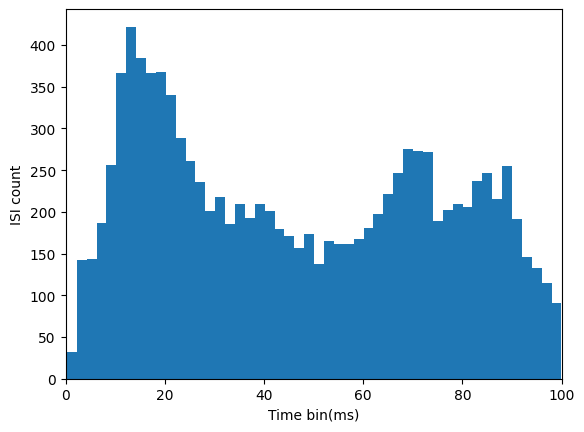

In [16]:
correlation(data_diazepam)
interspike(data_diazepam)

In the control dataset, the intervals between spikes for a neuron follow a Poisson distribution, while in the diazepam dataset, the distribution is more bimodal. The diazepam distribution has higher variance, indicating greater dispersion in the intervals. Additionally, the means have shifted: in the control dataset, the average interval was approximately $9$ ms, while in the diazepam dataset, the mean for the shorter inerval shifted rightward by a few milliseconds (on average longer). 

For the correlation matrix, we observe that neurons in the diazepam dataset become more highly correlated, whereas in the control dataset, they exhibit less correlation.

## Correlation & Spike Time Tilling (9.5 Points)

### Correlation Matrix Equation

Given a matrix $X$, with $n$ random variables as its rows, write down the formula that the correlation matrix

<font color="green"><b>Answer

Given a matrix $\mathbf{X} \in \mathbb{R}^{m \times n}$, with $m$ observations and $n$ random vectors.

Let the matrix $\mathbf{X}$

\begin{align*}
\mathbf{X} = \left[\begin{matrix}x_{1,1} & x_{1,2} & x_{1, 3} & \cdots & x_{1, n}\\
x_{2,1} & x_{2, 2} & x_{2, 3} & \cdots & x_{2, n}\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
x_{m, 1} & x_{m, 2} & x_{m, 3} & \cdots & x_{m, n}
\end{matrix}\right]
\end{align*}

the pearson correlation matrix $\mathbf{R} \in \mathbb{R}^{n \times n}$ for the data set $\mathbf{X}$ is computed by taking every pairwise column vector and calculating the correlation coefficient.

For any two column vectors $\mathbf{x}_i$ and $\mathbf{x}_j$ of $\mathbf{X}$, the pearson correlation coefficient $r_{i, j}$ is given by:

\begin{align*}
r_{i, j} = \frac{\sum_{k=1}^{m}(x_{k, i} - \bar{x}_i)(x_{k, j} - \bar{x}_j)}{\sqrt{\sum_{k=1}^{m}(x_{k, i} - \bar{x}_i)^2} \sqrt{\sum_{k=1}^{m}(x_{k, j} - \bar{x}_j)^2}}
\end{align*}

where $\bar{x}_i$ and $\bar{x}_j$ are the means of the columns $\mathbf{x}_i$ and $\mathbf{x}_j$ respectively, such that 

\begin{align*}
\bar{x}_i &= \frac{1}{m} \sum_{k=1}^{m} x_{k, i}\\
\quad\\
\bar{x}_j &= \frac{1}{m} \sum_{k=1}^{m} x_{k, j}
\end{align*}

The pearson correlation matrix $\mathbf{R}$ can then be expressed as:

\begin{align*}
\mathbf{R} = \left[\begin{matrix}r_{1,1} & r_{1, 2} & \cdots & r_{1, n}\\
r_{2, 1} & r_{2, 2} & \cdots & r_{2, n}\\
\vdots & \vdots & \ddots & \vdots\\
r_{n, 1} & r_{n, 2} & \cdots & r_{n, n}\end{matrix}\right]
\end{align*}



### Diagonal of Correlation Matrix (1 Point)

What are the values on the diagonal of the correlation matrix? Why?

<font color="orange">**Hint:** If you need to, you can check the values of the diagonal in the source code. This is not necessary to receive full credit though.

<font color="green"><b>Answer

The values on the diagonal are always equal to $1$. We can show this by computing the correlation coefficient for the a given random vector $\mathbf{x}_i$ with itself, or $r_{i, i}$

\begin{align*}
r_{i, i} &= \frac{\sum_{k=1}^{m}(x_{k, i} - \bar{x}_i)(x_{k, i} - \bar{x}_i)}{\sqrt{\sum_{k=1}^{m}(x_{k, i} - \bar{x}_i)^2} \sqrt{\sum_{k=1}^{m}(x_{k, i} - \bar{x}_i)^2}}\\
&= \frac{\sum_{k=1}^{m}(x_{k, i} - \bar{x}_i)^2}{\sum_{k=1}^{m}(x_{k, i} - \bar{x}_i)^2}\\
&= 1
\end{align*}

such that we can always define the correlation matrix to have values $1$ along the diagonal, 

\begin{align*}
\mathbf{R} = \left[\begin{matrix}1 & r_{1, 2} & \cdots & r_{1, n}\\
r_{2, 1} & 1 & \cdots & r_{2, n}\\
\vdots & \vdots & 1 & \vdots\\
r_{n, 1} & r_{n, 2} & \cdots & 1\end{matrix}\right]
\end{align*}


### Why STTC? (1.5 Points)

Briefly read through the paper on [spike time tilling](./reading_material/Spike_Time_Tiling.pdf). For electrophysiology, what is the advantage of using spike time tiling over correlation?

<font color="green"><b>Answer

The correlation index is unbounded above and it is affected by a neurons' firing rate, the Spike time tiling coefficient provides an unbiased correlation in firing between pairs of electrodes.

### Plot STTC (2 Points)

Use the braingeneerspy package's [analysis code](https://github.com/braingeneers/braingeneerspy/blob/master/src/braingeneers/analysis/analysis.py) to create a plot of the STTC for both the control dataset and the diazepam dataset. 

<font color="orange"><b>Hint:</b> This is the same package used in the source code to create the other plots. You only need to write 2 lines of code to complete this exercise. In the code, by default `delt=20`, leave it that way.

<font color="green"><b>Answer

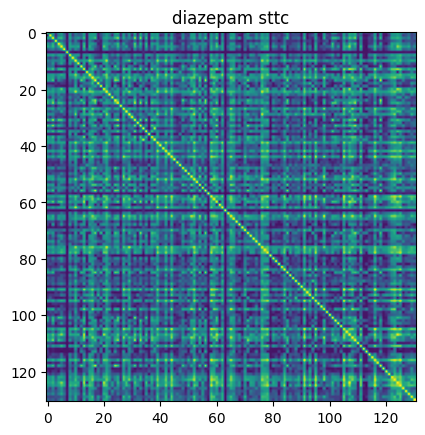

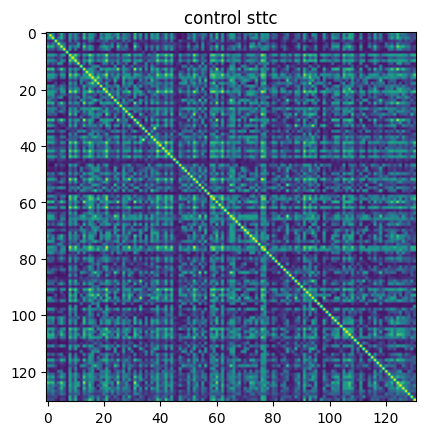

In [25]:
plt.imshow(data_diazepam.spike_time_tilings())
plt.title("diazepam sttc")
plt.show()

plt.imshow(data_control.spike_time_tilings())
plt.title("control sttc")
plt.show()


### Compare Plots (1.5 Points)

Compare the two plots of the STTC. Does the variation between these plots make sense, considering our understanding of diazepam? Explain. Is the comparison between these two plots consistent with the variation you see between the correlation matrices of both datasets?

<font color="green"><b>Answer

The diazepam dataset exhibits pronounced neuronal co-firing bands, whereas the control dataset demonstrates reduced inter-neuronal firing rate correlations with greater variance. While the control dataset displays a distinct upper-left quadrant, correlation values remain relatively uniform throughout the matrix. In contrast, the diazepam dataset shows globally elevated correlation coefficients, indicating increased synchronous activity across all neurons, yet lacks discernible structural organization.

### Diagonal of STTC (1.5 Points)

What do the diagonal values of the STTC equal. Why is this the case?

<font color="green"><b>Answer

Let us iterate through all the diagonal values of the STTC and print the value only when it changes.

In [28]:
dc = data_control.spike_time_tilings()
current_value = 0.0
for i in range(dc.shape[0]):
    new_value = dc[i, i]
    if new_value != current_value:
        print(new_value)
        current_value = new_value
    else:
        continue



1.0


thus all diagonal elements are equal to exactly $1.0$.

this is because the formula for the spike time tiling coefficient metric is measuring correlation and when you look at the correlation between the same neuron it will always be perfectly correlated. The metric is such that a $+1$ represents perfectly correlated a $-1$ represents perfectly anti-correlated and a $0$ represents perfectly uncorrelated.
